**Advanced Lane Finding Project**

The goals / steps of this project are the following:
    
1. Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
2, Apply a distortion correction to raw images.
2. Use color transforms, gradients, etc., to create a thresholded binary image.
3. Apply a perspective transform to rectify binary image.
4. Detect lane pixels and fit to find the lane boundary.
5. Determine the curvature of the lane and vehicle position with respect to center.
6. Warp the detected lane boundaries back onto the original image.
7. Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

** Camera Calibration **
Camera Calibration is handled in the python file Camera.py (line: 64 - 94), using the method 'calibrate_camera'.

** Undistort **
We then undistort the original image as below

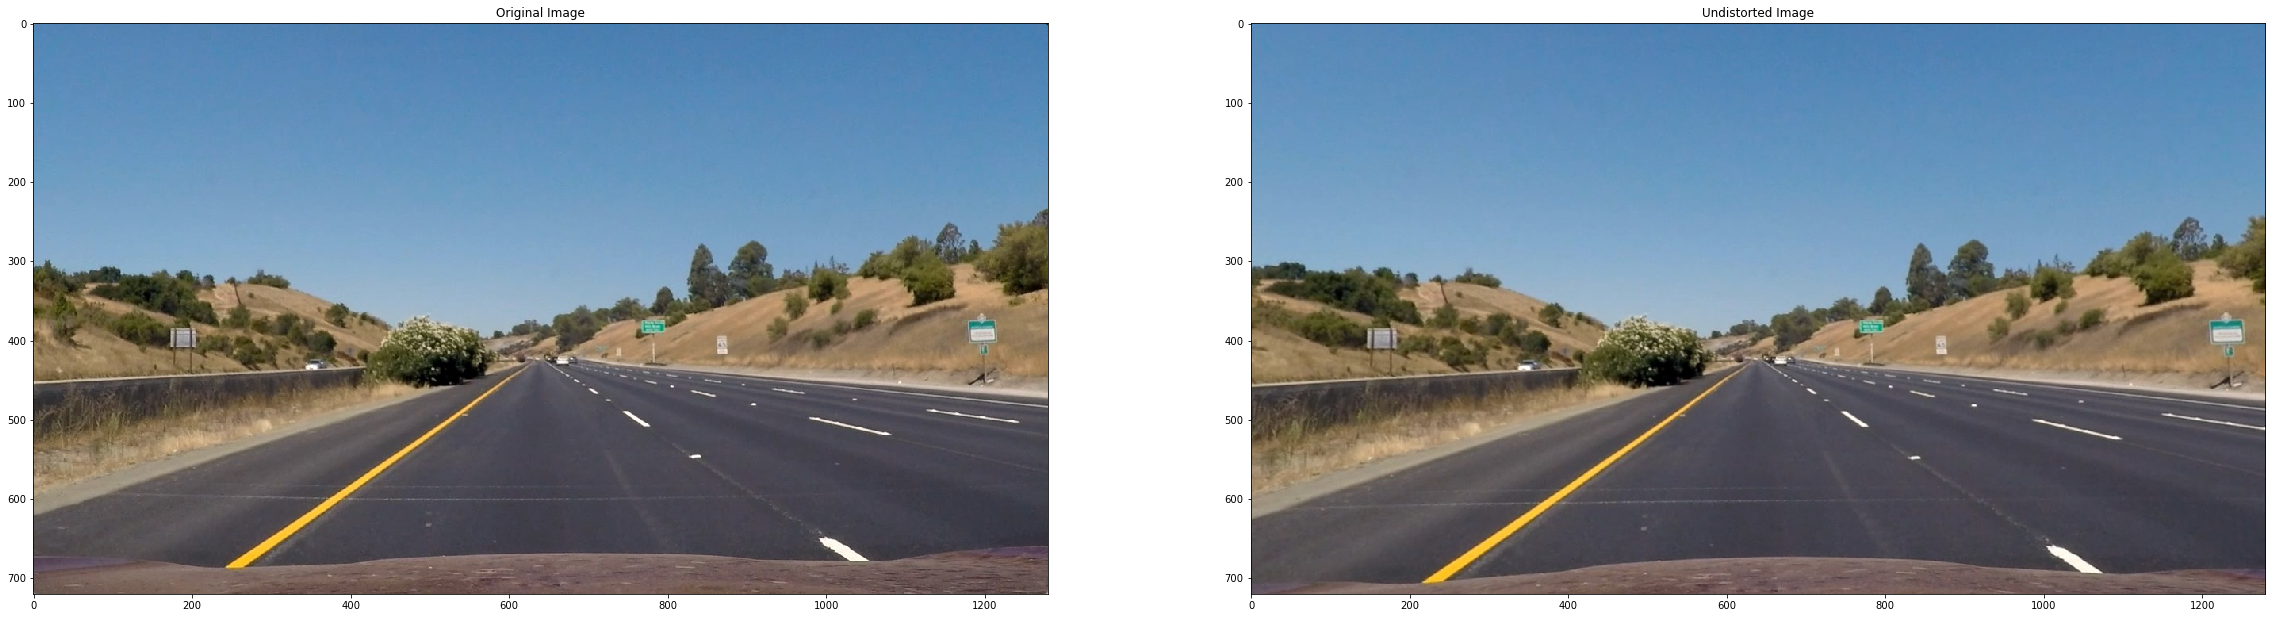

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2
%matplotlib inline

plt.figure(figsize=(40, 40))
plt.subplot(1, 2, 1)
plt.title("Original Image")
image = Image.open("test_images/straight_lines1.jpg")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Undistorted Image")
image = Image.open("output_images/straight_lines1_undistort.jpg")
plt.imshow(image)

** Color Transformation / Gradient **
The binary threshold image is created by applying yellow lane & white lane masks and then applying the gradient along X to identify the lanes. Below shows the binary thresholded image for the test image "straight_lines1.jpg" See Code Camera.py (lines 155 - 182)

def binary_thershold(img):
    #s_thresh = (150, 255)
    x_thresh = (60, 100)
    d_thresh = (0.7, 1.2)
    m_thresh = (50, 150)

    #s_channel = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)[:, :, 2]
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    #s_binary = np.zeros_like(s_channel)
    #s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1

    yellow_lane = self.yellow_mask(hsv)
    white_lane = self.white_mask(hsv)

    gray = self._convertToGray(img)
    grad_x = self.SobelOp(gray, ksize=15)
    grad_x_binary = np.zeros_like(gray)
    grad_x_binary[(grad_x >= x_thresh[0]) & (grad_x <= x_thresh[1])] = 1

    #dir_binary = self.dir_threshold(img, thresh=d_thresh, ksize=15)
    #mag_binary = self.mag_threshold(img, thresh=m_thresh, ksize=15)

    binary_output = np.zeros_like(gray)
    binary_output[(yellow_lane == 1) | (white_lane == 1) |
                   (grad_x_binary == 1) ] = 1
                    #((mag_binary == 1) & (dir_binary == 1))] = 1

    return binary_output

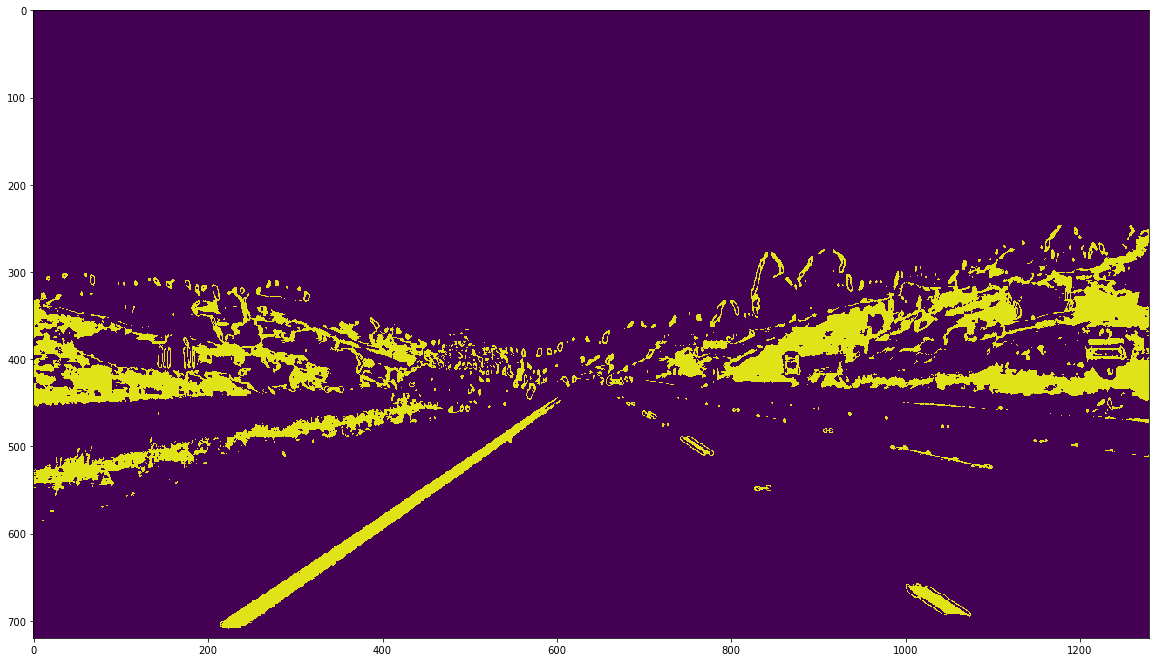

In [13]:
plt.figure(figsize=(20, 20))
image = Image.open("output_images/straight_lines1_binary.jpg")
plt.imshow(image)

** Perspective Transform **
Applied the perspective transform (using cv2.getPerspectiveTransform) to the above binary output to get the warped image. I chose the hardcoded value to apply perspective transform
         self._src = np.float32([ [580, 460],
                                 [700, 460],
                                 [260, 680],
                                 [1040, 680] ])

         self._dst = np.float32([ [260, 0],
                                 [1040, 0],
                                 [260, 680],
                                 [1040, 680] ])

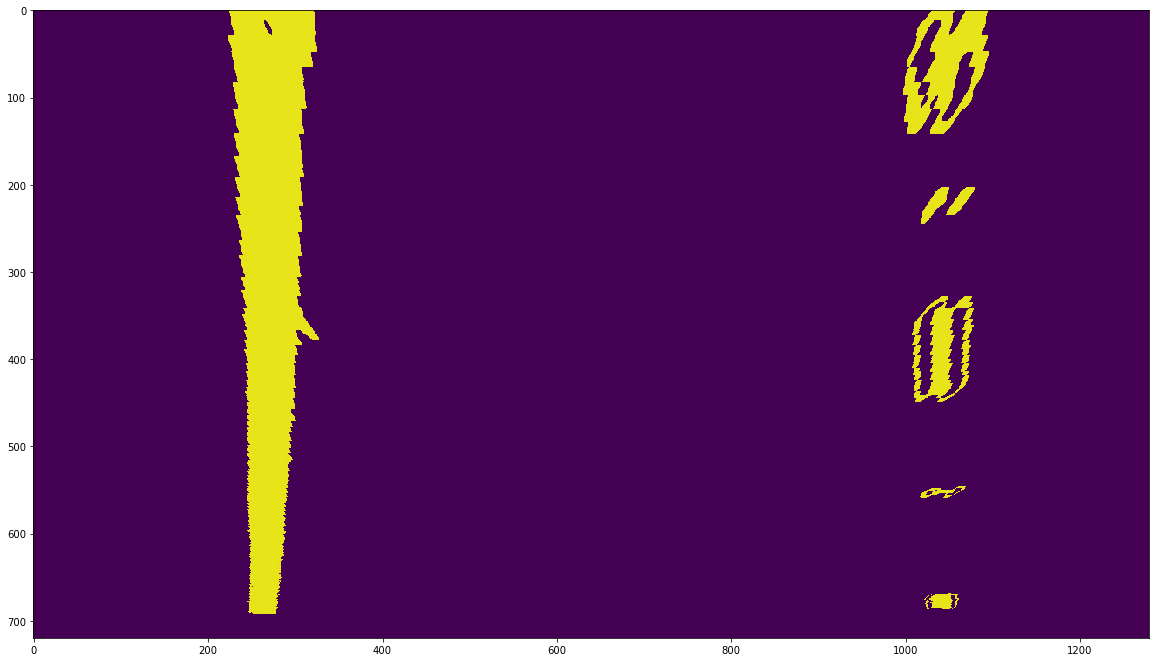

In [14]:
plt.figure(figsize=(20, 20))
image = Image.open("output_images/straight_lines1_warped.jpg")
plt.imshow(image)

** Detect lane pixels and fit to find the lane boundary. **
Divide the image into 9 small windows and apply histogram technique to identify the lines in the image and slide it across all the 9 image windows and then use polyfit method to fill the space between the lines identified. Refer to code Line.py (lines: 33 - 126), method: sliding_window_fit_plot

** Determine Lane Curvature and Car position **
Used the computed lane fit data (i.e. left_fit and right_fit) values to compute the lane curvature and lane deviation w.r.t to the car position. See code advanced_lane_finding.py (lines: 38 - 57)

** Warp the detected lane boundaries back onto the original image and display **
The computed lines are now unwarped and then combined with the original image to generate the final output. See below Final image

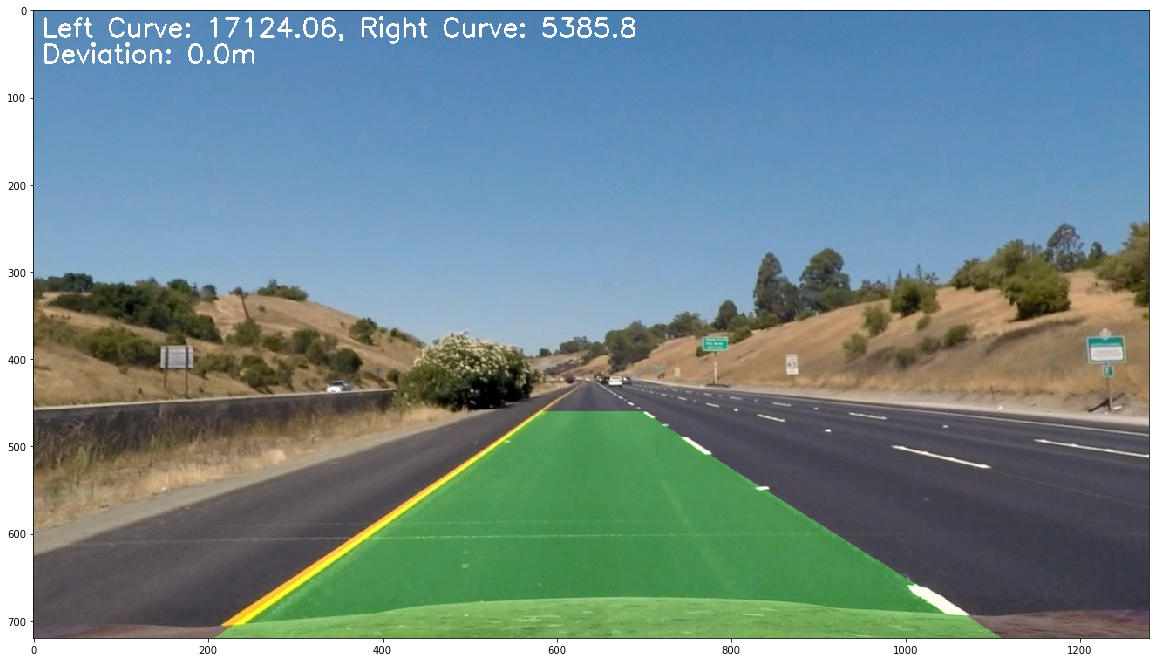

In [15]:
plt.figure(figsize=(20, 20))
image = Image.open("output_images/straight_lines1_final.jpg")
plt.imshow(image)

** Final Video Output ** Below is the link to the final complete video

In [18]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format("project_video_output.mp4"))

** Discussions ** 

From this project learned important image processing techniques. This project also showed the importance of tuning various paramters to identify the lanes correctly.

From my point I think my code will not perform as expected if the lanes are curved too much. Also if the lane color is extremely light.